In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pyvis.network import Network


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/global-air-transportation-network-mapping-the-wo")

print("Path to dataset files:", path)

100%|██████████| 0.99M/0.99M [00:01<00:00, 544kB/s]

Extracting files...
Path to dataset files: C:\Users\I745988\.cache\kagglehub\datasets\thedevastator\global-air-transportation-network-mapping-the-wo\versions\2


In [4]:
airplanes = pd.read_csv("C:/Users/I745988/.cache/kagglehub/datasets/thedevastator/global-air-transportation-network-mapping-the-wo/versions/2/airplanes.csv")
airlines = pd.read_csv("C:/Users/I745988/.cache/kagglehub/datasets/thedevastator/global-air-transportation-network-mapping-the-wo/versions/2/airlines.csv")
airports = pd.read_csv("C:/Users/I745988/.cache/kagglehub/datasets/thedevastator/global-air-transportation-network-mapping-the-wo/versions/2/airports.csv")
routes = pd.read_csv("C:/Users/I745988/.cache/kagglehub/datasets/thedevastator/global-air-transportation-network-mapping-the-wo/versions/2/routes.csv")

In [5]:
airplanes

,index,Name,IATA code,ICAO code
0,0,Aerospatiale (Nord) 262,ND2,N262
1,1,Aerospatiale (Sud Aviation) Se.210 Caravelle,CRV,S210
2,2,Aerospatiale SN.601 Corvette,NDC,S601
3,3,Aerospatiale/Alenia ATR 42-300,AT4,AT43
4,4,Aerospatiale/Alenia ATR 42-500,AT5,AT45
...,...,...,...,...
241,241,Tupolev Tu-144,\N,T144
242,242,Tupolev Tu-154,TU5,T154
243,243,Tupolev Tu-204,T20,T204
244,244,Yakovlev Yak-40,YK4,YK40


In [6]:
airlines

,index,Airline ID,Name,Alias,IATA,ICAO,Callsign,Country,Active
0,0,-1,Unknown,\N,-,NaN,\N,\N,Y
1,1,1,Private flight,\N,-,NaN,NaN,NaN,Y
2,2,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
3,3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
4,4,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N
...,...,...,...,...,...,...,...,...,...
6157,6157,21248,GX Airlines,NaN,NaN,CBG,SPRAY,China,Y
6158,6158,21251,Lynx Aviation (L3/SSX),NaN,NaN,SSX,Shasta,United States,N
6159,6159,21268,Jetgo Australia,NaN,JG,\N,NaN,Australia,Y
6160,6160,21270,Air Carnival,NaN,2S,\N,NaN,India,Y


In [7]:
airports

,index,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,7693,14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport,OurAirports
7694,7694,14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
7695,7695,14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
7696,7696,14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports


In [8]:
routes

,index,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
0,0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...,...
67658,67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [9]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6162 entries, 0 to 6161
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       6162 non-null   int64 
 1   Airline ID  6162 non-null   int64 
 2   Name        6162 non-null   object
 3   Alias       5656 non-null   object
 4   IATA        1535 non-null   object
 5   ICAO        6075 non-null   object
 6   Callsign    5354 non-null   object
 7   Country     6147 non-null   object
 8   Active      6162 non-null   object
dtypes: int64(2), object(7)
memory usage: 433.4+ KB


In [10]:
# Data cleaning
# Drop rows with missing IATA codes in the airports and routes files
airports.dropna(subset=['IATA'], inplace=True)
routes.dropna(subset=['Source airport', 'Destination airport'], inplace=True)

# Remove duplicate rows in routes
routes.drop_duplicates(inplace=True)

In [11]:
# Merge routes with airport data (latitude and longitude for source and destination)
routes = pd.merge(routes, airports[['IATA', 'Latitude', 'Longitude']], 
                   left_on='Source airport', right_on='IATA', how='left')
routes = pd.merge(routes, airports[['IATA', 'Latitude', 'Longitude']], 
                   left_on='Destination airport', right_on='IATA', how='left', suffixes=('_source', '_dest'))

In [14]:
from geopy.distance import geodesic
import networkx as nx
import matplotlib.pyplot as plt

In [16]:
import pandas as pd
from geopy.distance import geodesic

# Function to calculate distance with handling for missing or invalid coordinates
def calculate_distance(row):
    # Check if either latitude or longitude is NaN for source or destination
    if pd.isna(row['Latitude_source']) or pd.isna(row['Longitude_source']) or \
       pd.isna(row['Latitude_dest']) or pd.isna(row['Longitude_dest']):
        return None  # Return None for invalid coordinates
    
    # Calculate the geodesic distance if coordinates are valid
    source_coords = (row['Latitude_source'], row['Longitude_source'])
    dest_coords = (row['Latitude_dest'], row['Longitude_dest'])
    
    try:
        return geodesic(source_coords, dest_coords).kilometers
    except ValueError:
        return None  # In case of any other invalid coordinates, return None

# Apply the function to calculate distance
routes['distance_km'] = routes.apply(calculate_distance, axis=1)

# Drop rows with invalid distance values (None)
routes.dropna(subset=['distance_km'], inplace=True)

# Check the results
print(routes[['Source airport', 'Destination airport', 'distance_km']].head())


  Source airport Destination airport  distance_km
0            AER                 KZN  1507.989680
1            ASF                 KZN  1040.943207
2            ASF                 MRV   449.036664
3            CEK                 KZN   773.126239
4            CEK                 OVB  1343.161122


In [17]:
# Merge routes with airline data to get the airline name for each route
routes = pd.merge(routes, airlines[['IATA', 'Name']], 
                   left_on='Airline', right_on='IATA', how='left')

In [18]:
# Create the network graph
G = nx.Graph()  # You can use nx.DiGraph() for a directed graph if necessary

# Add nodes (airports)
for _, airport in airports.iterrows():
    G.add_node(airport['IATA'], label=airport['Name'], country=airport['Country'], 
               latitude=airport['Latitude'], longitude=airport['Longitude'])

# Add edges (routes)
for _, route in routes.iterrows():
    G.add_edge(route['Source airport'], route['Destination airport'], 
               weight=route['distance_km'], airline=route['Name'], 
               stops=route['Stops'], equipment=route['Equipment'])


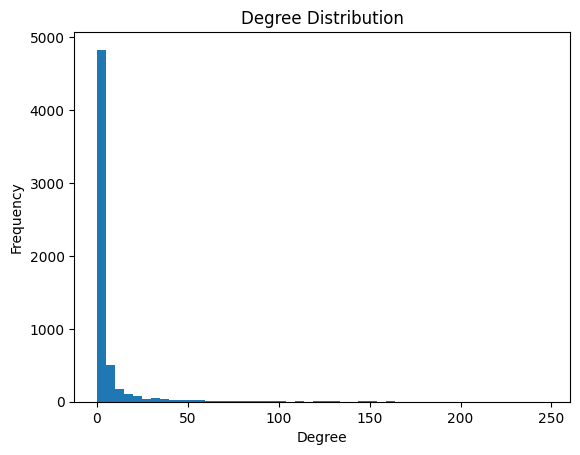

In [19]:

# Network Analysis Example: Degree Distribution
degree_sequence = [G.degree(node) for node in G.nodes()]
plt.hist(degree_sequence, bins=50)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

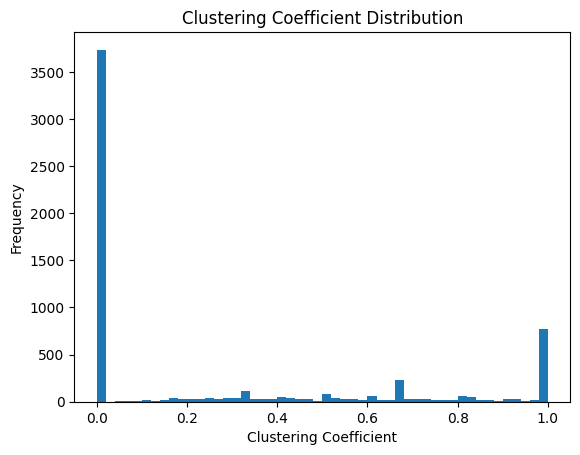

In [20]:

# Clustering Coefficient Example
clustering_coeff = nx.clustering(G)
plt.hist(list(clustering_coeff.values()), bins=50)
plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.show()

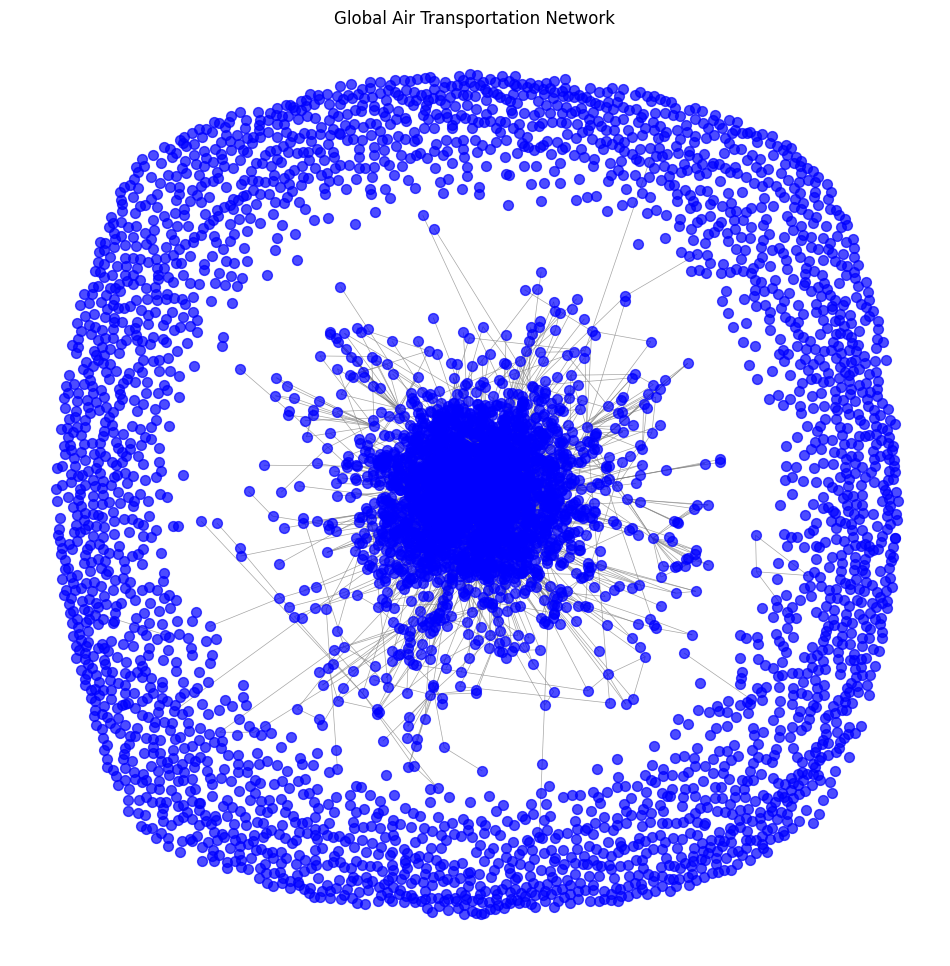

In [26]:
import matplotlib.pyplot as plt

# Create the layout for positioning the nodes
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15, iterations=20)  # Layout for node positions

# Draw the nodes (airports)
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='blue', alpha=0.7)

# Draw the edges (routes) with labels (optional, to make them visible)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.7, edge_color='gray')

# Optional: Draw edge labels (e.g., the weight/distance of the routes)
"""edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)"""

# Draw the node labels (airport codes)
#nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Title and display the graph
plt.title("Global Air Transportation Network")
plt.axis('off')  # Turn off axis
plt.show()


In [27]:
# Get the number of nodes (airports) and edges (routes)
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Display the results
print(f"Number of nodes (airports): {num_nodes}")
print(f"Number of edges (routes): {num_edges}")


Number of nodes (airports): 6073
Number of edges (routes): 18931


In [ ]:
# Optionally save preprocessed data
routes.to_csv('preprocessed_routes.csv', index=False)

# Saving the network graph
nx.write_gml(G, 'global_air_transportation_network.gml')

Finding the Largest Connected Component

In [28]:
# Find the largest connected component
largest_component = max(nx.connected_components(G), key=len)

# Subgraph containing only the largest connected component
G_largest = G.subgraph(largest_component).copy()

# Get the number of nodes and edges in the largest component
num_nodes_largest = G_largest.number_of_nodes()
num_edges_largest = G_largest.number_of_edges()

print(f"Number of nodes in the largest connected component: {num_nodes_largest}")
print(f"Number of edges in the largest connected component: {num_edges_largest}")


Number of nodes in the largest connected component: 3231
Number of edges in the largest connected component: 18906


Number of nodes (airports): You will get the total number of airports in your dataset.
Number of edges (routes): You will get the total number of flight routes connecting these airports.

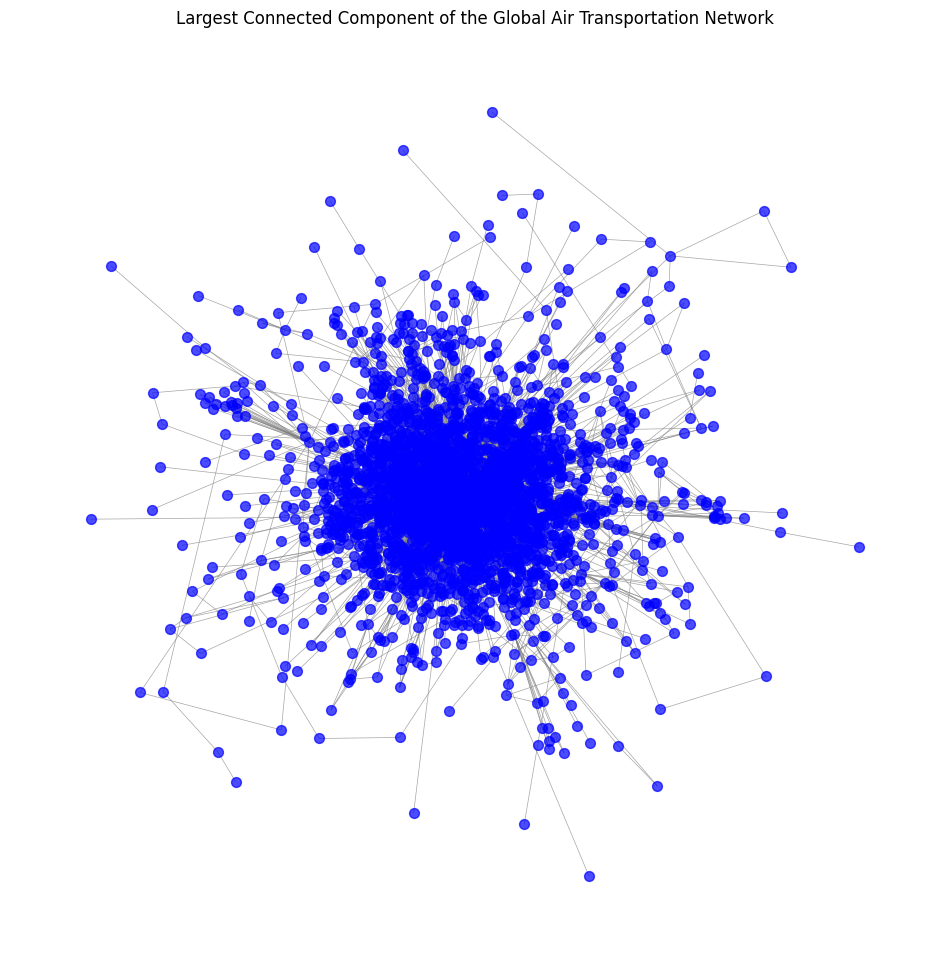

In [31]:
# Create the layout for positioning the nodes
plt.figure(figsize=(12, 12))
pos_largest = nx.spring_layout(G_largest, k=0.15, iterations=20)  # Layout for node positions

# Draw the nodes of the largest connected component
nx.draw_networkx_nodes(G_largest, pos_largest, node_size=50, node_color='blue', alpha=0.7)

# Draw the edges of the largest connected component
nx.draw_networkx_edges(G_largest, pos_largest, width=0.5, alpha=0.7, edge_color='gray')

# Optional: Draw edge labels (e.g., the weight/distance of the routes)
"""edge_labels_largest = nx.get_edge_attributes(G_largest, 'weight')
nx.draw_networkx_edge_labels(G_largest, pos_largest, edge_labels=edge_labels_largest, font_size=8)
"""
# Draw the node labels (airport codes)
#nx.draw_networkx_labels(G_largest, pos_largest, font_size=10, font_color='black')

# Title and display the graph
plt.title("Largest Connected Component of the Global Air Transportation Network")
plt.axis('off')  # Turn off axis
plt.show()


Network Construction Using Number of Flights as Weight

In [32]:
# Aggregate the number of flights between airports
routes['route'] = list(zip(routes['Source airport'], routes['Destination airport']))
flight_counts = routes['route'].value_counts().reset_index()
flight_counts.columns = ['route', 'count']

# Extract source, destination, and count
flight_counts[['source', 'destination']] = pd.DataFrame(flight_counts['route'].tolist(), index=flight_counts.index)
flight_counts.drop(columns=['route'], inplace=True)


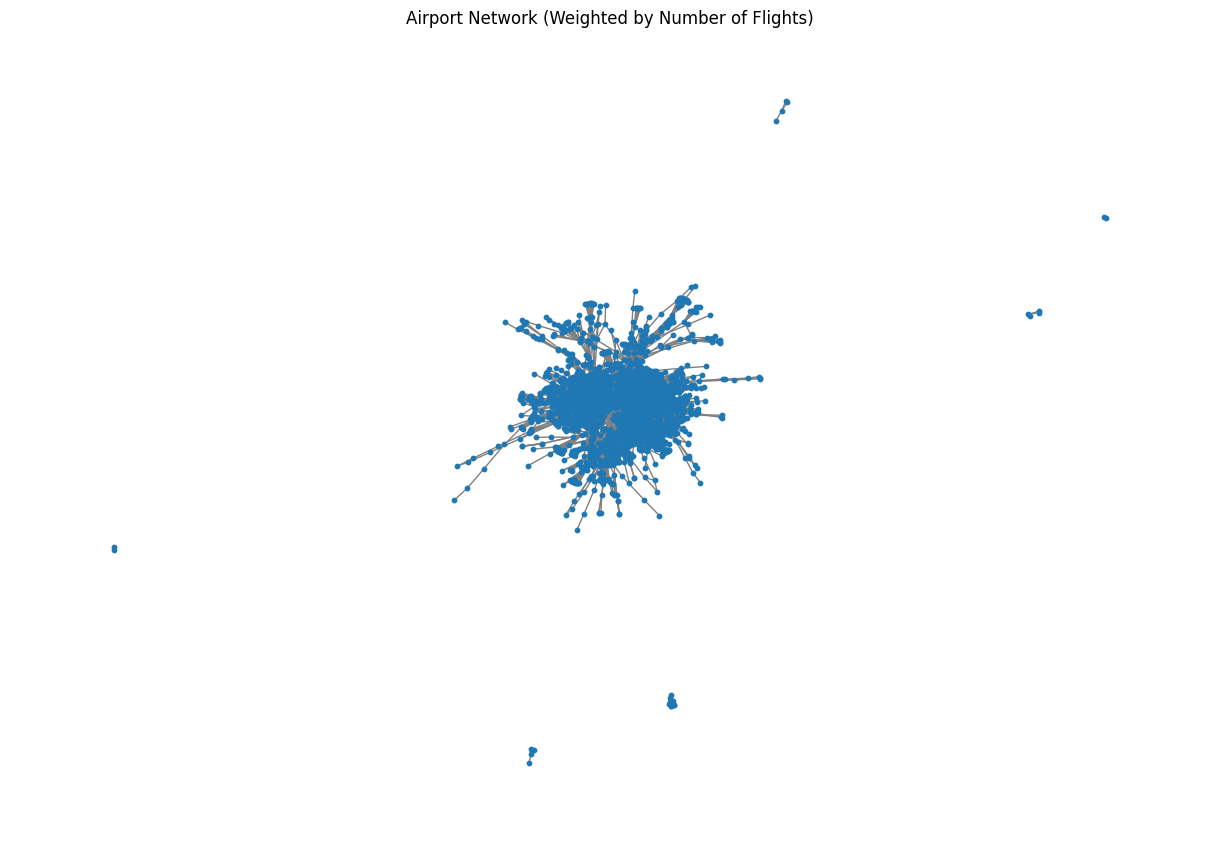

In [33]:
# Create graph with number of flights as weights
G_flights = nx.Graph()

# Add edges with weights based on flight count
for _, row in flight_counts.iterrows():
    G_flights.add_edge(row['source'], row['destination'], weight=row['count'])

# Basic visualization
plt.figure(figsize=(12, 8))
nx.draw(G_flights, node_size=10, edge_color='gray', with_labels=False)
plt.title("Airport Network (Weighted by Number of Flights)")
plt.show()


Network Construction Using Distance as Weight

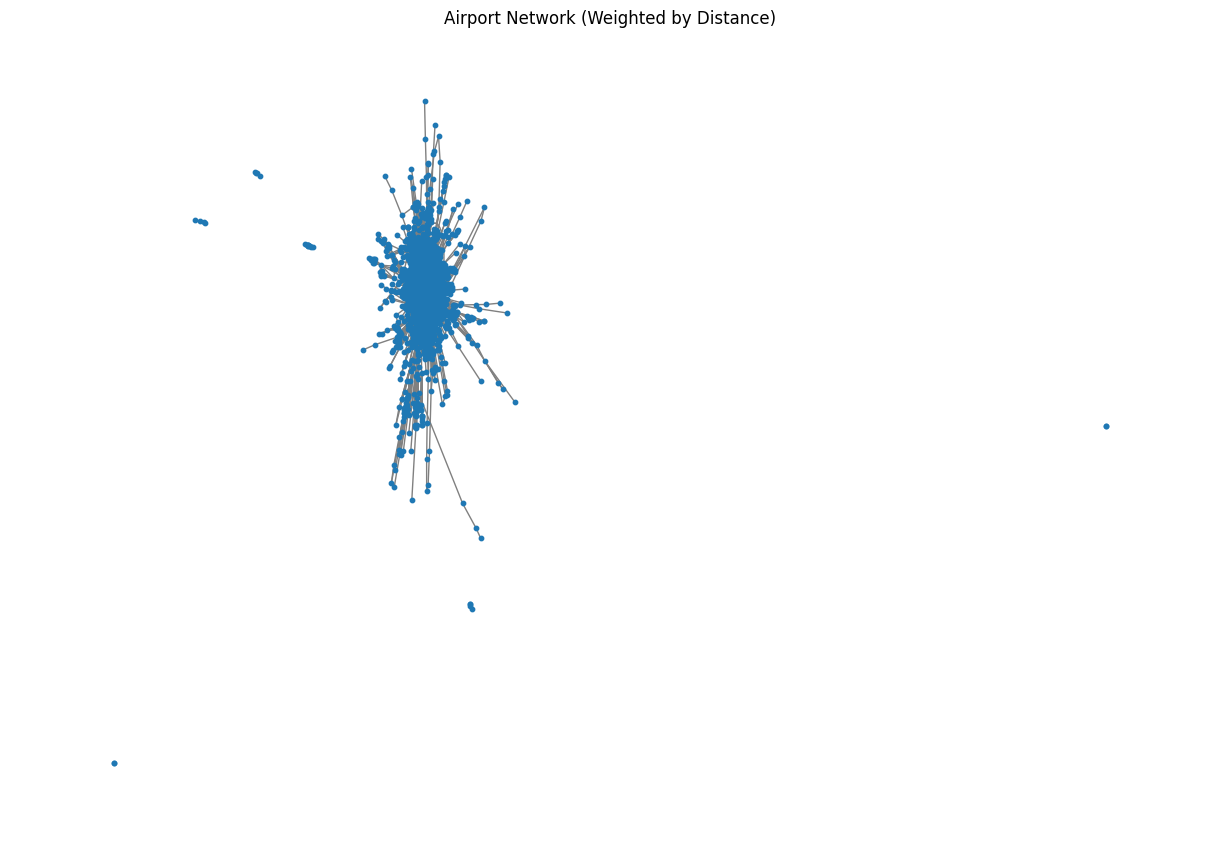

In [34]:
# Create graph with distance as weights
G_distance = nx.Graph()

# Add edges with weights based on distance
for _, row in routes.iterrows():
    G_distance.add_edge(row['Source airport'], row['Destination airport'], weight=row['distance_km'])

# Basic visualization
plt.figure(figsize=(12, 8))
nx.draw(G_distance, node_size=10, edge_color='gray', with_labels=False)
plt.title("Airport Network (Weighted by Distance)")
plt.show()


In [35]:
def analyze_network(G, weight_name):
    # Degree distribution
    degree_distribution = [d for _, d in G.degree()]
    average_degree = np.mean(degree_distribution)

    # Density
    density = nx.density(G)

    # Clustering coefficient
    average_clustering = nx.average_clustering(G)

    # Centrality measures
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
    closeness_centrality = nx.closeness_centrality(G)

    # Summary
    print(f"--- Network Analysis ({weight_name}) ---")
    print(f"Average Degree: {average_degree}")
    print(f"Density: {density}")
    print(f"Average Clustering Coefficient: {average_clustering}")
    print(f"Top 5 Degree Centrality Nodes: {sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]}")
    print(f"Top 5 Betweenness Centrality Nodes: {sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]}")
    print(f"Top 5 Closeness Centrality Nodes: {sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]}")


In [36]:
analyze_network(G_flights, "Number of Flights")
analyze_network(G_distance, "Distance")

--- Network Analysis (Number of Flights) ---
Average Degree: 11.624808105618667
Density: 0.003570272759710893
Average Clustering Coefficient: 0.48792449208680305
Top 5 Degree Centrality Nodes: [('AMS', 0.07616707616707616), ('FRA', 0.07493857493857493), ('CDG', 0.07371007371007371), ('IST', 0.07217444717444717), ('ATL', 0.06664619164619165)]
Top 5 Betweenness Centrality Nodes: [('ANC', 0.05863303987794298), ('DOH', 0.05850072564811466), ('HNL', 0.05121570770014965), ('YYZ', 0.0489381038494319), ('IAH', 0.04245000391131053)]
Top 5 Closeness Centrality Nodes: [('FRA', 0.41026986129418913), ('CDG', 0.40786756831817933), ('LHR', 0.40544193555708175), ('AMS', 0.4010272361336191), ('DXB', 0.40012582626218995)]
--- Network Analysis (Distance) ---
Average Degree: 11.624808105618667
Density: 0.003570272759710893
Average Clustering Coefficient: 0.48792449208680244
Top 5 Degree Centrality Nodes: [('AMS', 0.07616707616707616), ('FRA', 0.07493857493857493), ('CDG', 0.07371007371007371), ('IST', 0.0

In [40]:
# Define the function to compute network metrics
def compute_metrics(G):
    metrics = {}
    metrics['Number of Nodes'] = G.number_of_nodes()
    metrics['Number of Edges'] = G.number_of_edges()
    metrics['Average Degree'] = sum(dict(G.degree()).values()) / G.number_of_nodes()
    metrics['Clustering Coefficient'] = nx.average_clustering(G)
    
    # Check for connected components and compute diameter only for the largest connected component
    if nx.is_connected(G):
        metrics['Diameter'] = nx.diameter(G)
    else:
        largest_cc = max(nx.connected_components(G), key=len)
        subgraph = G.subgraph(largest_cc)
        metrics['Diameter'] = nx.diameter(subgraph)
    
    metrics['Density'] = nx.density(G)
    metrics['Average Path Length'] = nx.average_shortest_path_length(G.subgraph(largest_cc))
    return metrics

# Compute metrics for the graph with flights as weights
metrics_flights = compute_metrics(G_flights)

# Compute metrics for the graph with distance as weights
metrics_distance = compute_metrics(G_distance)

# Compare metrics
comparison = pd.DataFrame({
    'Metric': ['Number of Nodes', 'Number of Edges', 'Average Degree', 
               'Clustering Coefficient', 'Diameter', 'Density', 'Average Path Length'],
    'Flights Network': [metrics_flights['Number of Nodes'], metrics_flights['Number of Edges'], metrics_flights['Average Degree'],
                        metrics_flights['Clustering Coefficient'], metrics_flights['Diameter'], 
                        metrics_flights['Density'], metrics_flights['Average Path Length']],
    'Distance Network': [metrics_distance['Number of Nodes'], metrics_distance['Number of Edges'], metrics_distance['Average Degree'],
                         metrics_distance['Clustering Coefficient'], metrics_distance['Diameter'], 
                         metrics_distance['Density'], metrics_distance['Average Path Length']]
})

# Display the comparison
print(comparison)


                   Metric  Flights Network  Distance Network
0         Number of Nodes      3257.000000       3257.000000
1         Number of Edges     18931.000000      18931.000000
2          Average Degree        11.624808         11.624808
3  Clustering Coefficient         0.487924          0.487924
4                Diameter        12.000000         12.000000
5                 Density         0.003570          0.003570
6     Average Path Length         3.967122          3.967122


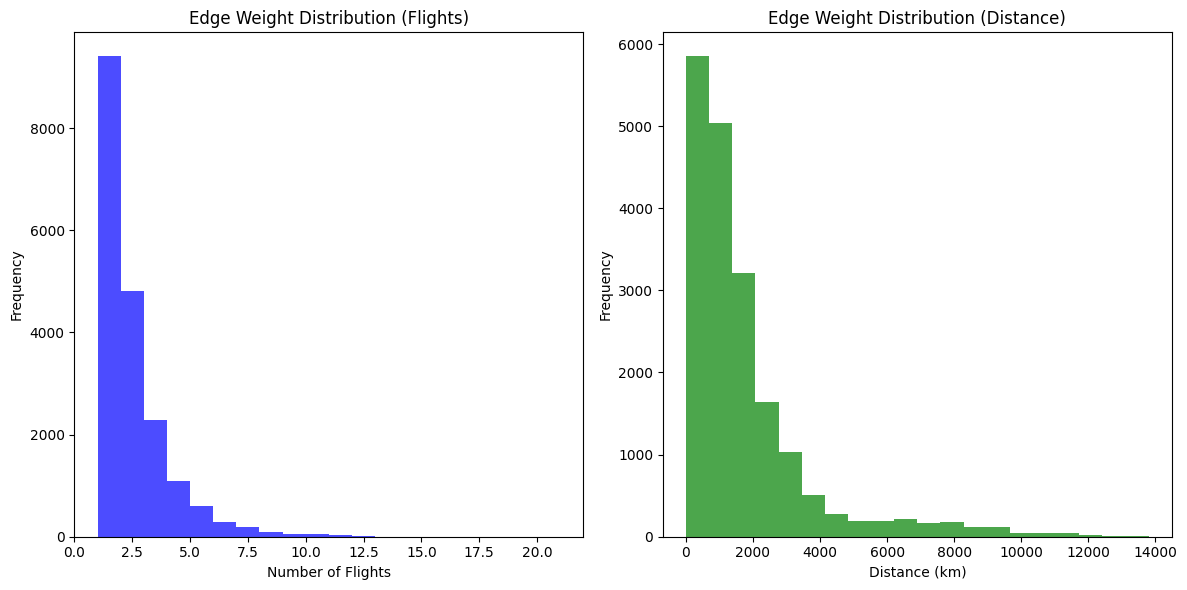

In [41]:
# Visualize edge weights distribution for both networks
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
weights_flights = [data['weight'] for _, _, data in G_flights.edges(data=True)]
plt.hist(weights_flights, bins=20, color='blue', alpha=0.7)
plt.title("Edge Weight Distribution (Flights)")
plt.xlabel("Number of Flights")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
weights_distance = [data['weight'] for _, _, data in G_distance.edges(data=True)]
plt.hist(weights_distance, bins=20, color='green', alpha=0.7)
plt.title("Edge Weight Distribution (Distance)")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

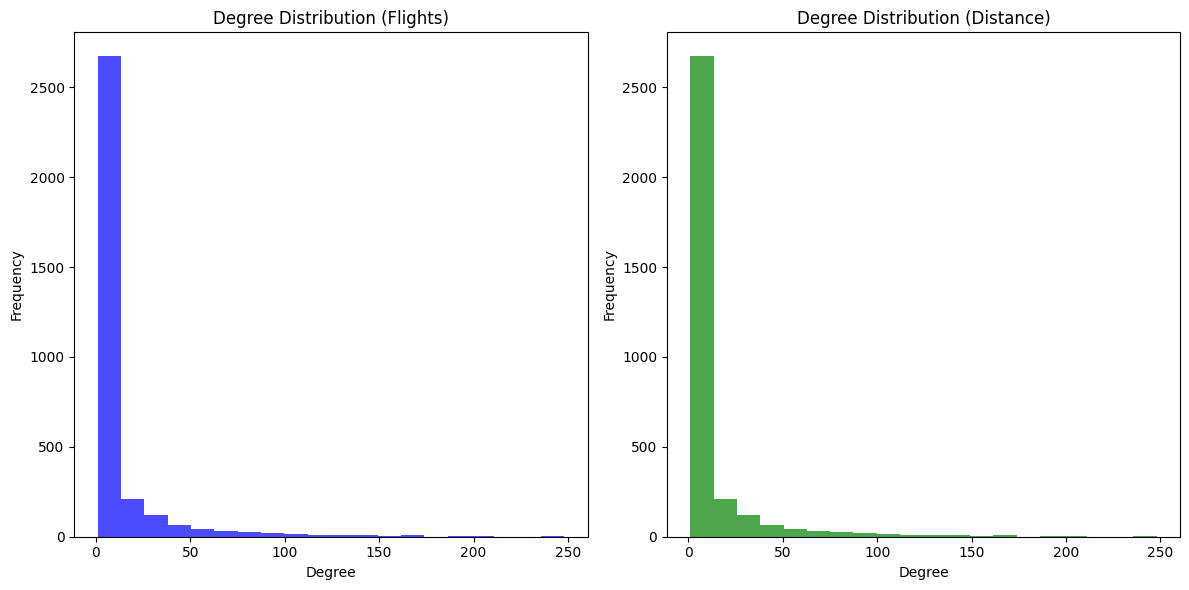

In [42]:
# Visualize degree distribution for both networks
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
degrees_flights = [val for (_, val) in G_flights.degree()]
plt.hist(degrees_flights, bins=20, color='blue', alpha=0.7)
plt.title("Degree Distribution (Flights)")
plt.xlabel("Degree")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
degrees_distance = [val for (_, val) in G_distance.degree()]
plt.hist(degrees_distance, bins=20, color='green', alpha=0.7)
plt.title("Degree Distribution (Distance)")
plt.xlabel("Degree")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [43]:
# Compare communities using Louvain method (requires 'community' package)
from community import community_louvain

partition_flights = community_louvain.best_partition(G_flights.to_undirected())
partition_distance = community_louvain.best_partition(G_distance.to_undirected())

print("Number of Communities:")
print(f"Flights Network: {len(set(partition_flights.values()))}")
print(f"Distance Network: {len(set(partition_distance.values()))}")

ModuleNotFoundError: No module named 'community'